# Kamil Winczewski 245958 Eksploracyjna Analiza Danych


# Żłobki a zatrudnienie wśród kobiet

## Źródła danych
[Mapa województw w Polsce](https://github.com/andilabs/polska-wojewodztwa-geojson)
<br>
[Informacje o żłobkach i zatrudnieniu wśród kobiet](https://bdl.stat.gov.pl/bdl/dane/podgrup/temat)

## Zaimportowanie bibliotek

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import plotly.express as px

## Podstawowy opis danych

### informacje o ilości żłobków

- **Nazwa**: Nazwa województwa
- **Żłobki**: ilość żłobków w danym województwie w określonym roku
- **Miejsca w żłobkach**: Ilość miejsc w żłobkach w danym województwie w określonym roku
- **Dzieci przebywające w ciągu roku w żłobkach**: Suma wszystkich dzieci które przebywały w żłobku w danym województwie w określonym roku
- **Dzieci w żłobkach stan w dniu 31 grudnia**: Ilość dzieci w żłobkach pod koniec roku w danym województwie w określonym roku

In [107]:
zlobki = pd.read_csv("dane/zlobki.csv", delimiter=";")
zlobki = zlobki.drop(columns=["Unnamed: 50", "Kod"])
zlobki.head()

,Nazwa,żłobki;2012;[ob.],żłobki;2013;[ob.],żłobki;2014;[ob.],żłobki;2015;[ob.],żłobki;2016;[ob.],żłobki;2017;[ob.],żłobki;2018;[ob.],żłobki;2019;[ob.],żłobki;2020;[ob.],...,dzieci w żłobkach stan w dniu 31 grudnia;2014;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2015;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2016;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2017;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2018;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2019;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2020;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2021;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2022;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2023;[osoba]
0,DOLNOŚLĄSKIE,78,127,187,219,243,275,330,378,399,...,NaN,8147,9207,10401,12841,14547,14685,16199,17134,17408
1,KUJAWSKO-POMORSKIE,24,33,47,60,68,83,112,133,139,...,NaN,2538,2876,3467,4401,5208,5403,6376,6678,6702
2,LUBELSKIE,25,38,44,52,67,78,116,140,163,...,NaN,2274,2570,3100,4301,5120,5368,6465,7000,6939
3,LUBUSKIE,22,35,47,47,54,58,77,83,88,...,NaN,2001,2390,2615,3284,3685,3648,4231,4599,4537
4,ŁÓDZKIE,49,59,70,74,94,107,147,179,186,...,NaN,3860,4560,4865,6025,7217,6843,7711,8819,8740


In [108]:
zlobki.describe()

,żłobki;2012;[ob.],żłobki;2013;[ob.],żłobki;2014;[ob.],żłobki;2015;[ob.],żłobki;2016;[ob.],żłobki;2017;[ob.],żłobki;2018;[ob.],żłobki;2019;[ob.],żłobki;2020;[ob.],żłobki;2021;[ob.],...,dzieci w żłobkach stan w dniu 31 grudnia;2014;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2015;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2016;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2017;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2018;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2019;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2020;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2021;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2022;[osoba],dzieci w żłobkach stan w dniu 31 grudnia;2023;[osoba]
count,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,0.0,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,43.687500,69.500000,100.312500,117.1250,135.750000,155.312500,194.187500,226.937500,239.437500,262.500000,...,NaN,4240.187500,4897.062500,5544.125,7009.687500,8233.375000,8179.437500,9366.062500,10176.625000,10146.250000
std,30.352855,50.194289,77.460286,92.9386,104.499761,119.824716,143.609758,168.027565,172.232776,185.773697,...,NaN,2990.931855,3354.336943,3790.326,4687.557384,5587.600187,5555.406951,6260.128587,6853.581291,6934.956424
min,13.000000,16.000000,28.000000,31.0000,38.000000,43.000000,53.000000,65.000000,68.000000,81.000000,...,NaN,1217.000000,1525.000000,1730.000,2071.000000,2478.000000,2471.000000,3082.000000,3373.000000,3392.000000
25%,23.500000,34.500000,46.250000,51.0000,61.500000,68.500000,86.750000,99.000000,106.500000,116.000000,...,NaN,2205.750000,2525.000000,2851.250,3730.250000,4176.000000,4041.250000,4704.750000,5150.000000,5118.000000
50%,32.500000,45.000000,68.500000,75.5000,93.500000,109.000000,140.500000,165.000000,177.000000,199.500000,...,NaN,3372.000000,3765.000000,4310.500,5467.500000,6418.500000,6480.000000,7463.000000,8064.000000,7841.000000
75%,64.250000,110.250000,148.250000,172.5000,207.750000,250.750000,313.500000,357.000000,387.750000,416.250000,...,NaN,6008.500000,7385.250000,8756.000,10986.750000,12664.000000,12292.750000,13885.250000,15398.000000,15427.500000
max,119.000000,194.000000,306.000000,373.0000,422.000000,476.000000,579.000000,677.000000,681.000000,752.000000,...,NaN,12271.000000,13490.000000,15006.000,18713.000000,22951.000000,23042.000000,26284.000000,29077.000000,29322.000000


### informacje o współczynniku dzieci w żłobkach

- **Nazwa**: Nazwa województwa
- **Odsetek dzieci objętych opieką w żłobkach**: Procent dzieci do lat 3 które przebywały w danym roku w żłobku

In [109]:
# do lat 3
zlobki_wspolczynnik = pd.read_csv("dane/odsetek_dzieci_w_zlobkach.csv", delimiter=";")
zlobki_wspolczynnik = zlobki_wspolczynnik.drop(columns=["Unnamed: 14", "Kod"])
for year in range(2012, 2024):
    kolumny = [col for col in zlobki_wspolczynnik.columns if str(year) in col]
    zlobki_wspolczynnik[kolumny] = (
        zlobki_wspolczynnik[kolumny].replace({",": "."}, regex=True).astype(float)
    )
zlobki_wspolczynnik.head()

,Nazwa,odsetek dzieci objętych opieką w żłobkach;ogółem;2012;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2013;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2014;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2015;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2016;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2017;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2018;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2019;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2020;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2021;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2022;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2023;[%]
0,DOLNOŚLĄSKIE,6.6,8.1,10.0,11.3,12.5,13.9,16.6,19.2,20.2,23.2,25.8,28.4
1,KUJAWSKO-POMORSKIE,3.0,3.5,4.3,4.9,5.6,6.5,8.1,10.0,10.8,13.7,15.7,17.4
2,LUBELSKIE,2.6,3.3,3.8,4.5,5.3,6.1,7.7,9.3,9.8,12.8,14.9,16.0
3,LUBUSKIE,5.1,6.3,7.7,7.9,9.3,10.1,12.7,14.5,15.5,19.2,22.4,24.6
4,ŁÓDZKIE,4.8,5.2,5.8,6.4,7.7,8.3,10.0,11.6,11.4,13.6,16.6,17.8


In [110]:
zlobki_wspolczynnik.describe()

,odsetek dzieci objętych opieką w żłobkach;ogółem;2012;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2013;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2014;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2015;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2016;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2017;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2018;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2019;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2020;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2021;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2022;[%],odsetek dzieci objętych opieką w żłobkach;ogółem;2023;[%]
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,3.912500,4.887500,5.956250,6.762500,7.768750,8.537500,10.506250,12.300000,12.75000,15.543750,18.012500,19.512500
std,1.442163,1.666883,1.927336,2.160825,2.242237,2.300109,2.829245,2.959955,3.10784,3.433748,3.769859,4.053455
min,2.300000,3.100000,3.800000,4.200000,5.300000,5.700000,6.900000,8.500000,8.80000,10.600000,12.700000,14.000000
25%,2.900000,3.800000,4.675000,5.500000,6.125000,6.875000,8.325000,10.450000,11.17500,13.675000,15.700000,17.000000
50%,3.350000,4.250000,5.400000,6.200000,7.550000,8.250000,10.150000,11.800000,12.10000,14.300000,16.900000,18.350000
75%,4.650000,5.550000,7.000000,7.750000,8.850000,9.625000,11.475000,13.750000,14.45000,17.225000,20.100000,21.450000
max,7.200000,8.700000,10.000000,11.300000,12.500000,13.900000,16.600000,19.200000,20.20000,23.200000,25.800000,28.400000


### informacje o ilości zatrudnionych kobiet

- **Nazwa**: Nazwa województwa
- **Aktywni zawodowo pracujący**: Ilość kobiet w wieku 15-89 aktywnie pracujących w poszczególnych latach (wartość podana w tysiącach)

In [111]:
pracujacy_ilosc = pd.read_csv("dane/pracujacy.csv", delimiter=";")
pracujacy_ilosc = pracujacy_ilosc.drop(columns=["Unnamed: 14", "Kod"])
pracujacy_ilosc.head()

,Nazwa,aktywni zawodowo pracujący;kobiety;wartość liczbowa;2012;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2013;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2014;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2015;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2016;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2017;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2018;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2019;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2020;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2021;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2022;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2023;[tys. osób]
0,DOLNOŚLĄSKIE,495,474,492,511,554,555,565,615,618,616,609,636
1,KUJAWSKO-POMORSKIE,340,326,337,369,377,376,380,382,385,399,413,412
2,LUBELSKIE,406,406,428,445,374,375,384,376,377,395,403,401
3,LUBUSKIE,180,179,178,184,190,190,189,193,192,193,194,199
4,ŁÓDZKIE,531,553,566,554,499,507,508,485,493,501,516,504


In [112]:
pracujacy_ilosc.describe()

,aktywni zawodowo pracujący;kobiety;wartość liczbowa;2012;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2013;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2014;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2015;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2016;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2017;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2018;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2019;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2020;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2021;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2022;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2023;[tys. osób]
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
mean,422.312500,421.812500,432.687500,442.750000,447.937500,454.812500,458.750000,468.812500,467.750000,485.250000,491.25000,496.562500
std,262.243327,259.400904,272.604896,276.281378,269.181839,271.884833,277.423503,289.751668,284.838083,298.028522,300.69198,307.077616
min,155.000000,150.000000,161.000000,175.000000,169.000000,170.000000,175.000000,180.000000,181.000000,193.000000,190.00000,190.000000
25%,231.250000,227.500000,235.750000,241.750000,229.500000,234.000000,233.750000,234.750000,239.750000,250.500000,250.50000,253.500000
50%,360.000000,361.500000,366.000000,402.500000,375.500000,375.500000,382.000000,379.000000,381.000000,397.000000,408.00000,406.500000
75%,531.000000,540.250000,552.500000,543.500000,564.250000,569.500000,578.500000,623.250000,624.000000,630.750000,625.50000,653.250000
max,1118.000000,1100.000000,1188.000000,1244.000000,1144.000000,1151.000000,1181.000000,1242.000000,1228.000000,1280.000000,1299.00000,1330.000000


### informacje o współczynniku aktywności zawodowej 

- **Nazwa**: Nazwa województwa
- **W wieku produkcyjnym**: Procent kobiet w wieku produkcyjnym które są aktywne zawodowo

In [113]:
pracujacy_wspolczynnik = pd.read_csv("dane/wskaznik pracujacych.csv", delimiter=";")
pracujacy_wspolczynnik = pracujacy_wspolczynnik.drop(columns=["Unnamed: 9", "Kod"])
for year in range(2012, 2024):
    kolumny = [col for col in pracujacy_wspolczynnik.columns if str(year) in col]
    pracujacy_wspolczynnik[kolumny] = (
        pracujacy_wspolczynnik[kolumny].replace({",": "."}, regex=True).astype(float)
    )
pracujacy_wspolczynnik.head()

,Nazwa,w wieku produkcyjnym;kobiety;wartość liczbowa;2012;[%],w wieku produkcyjnym;kobiety;wartość liczbowa;2013;[%],w wieku produkcyjnym;kobiety;wartość liczbowa;2014;[%],w wieku produkcyjnym;kobiety;wartość liczbowa;2015;[%],w wieku produkcyjnym;kobiety;wartość liczbowa;2016;[%],w wieku produkcyjnym;kobiety;wartość liczbowa;2017;[%],w wieku produkcyjnym;kobiety;wartość liczbowa;2018;[%]
0,DOLNOŚLĄSKIE,60.6,60.6,63.7,65.1,67.1,67.9,70.7
1,KUJAWSKO-POMORSKIE,57.3,56.6,58.0,61.2,63.2,63.6,65.7
2,LUBELSKIE,60.2,59.6,61.9,63.0,62.5,63.7,66.4
3,LUBUSKIE,59.0,59.2,61.1,63.7,65.9,67.4,68.3
4,ŁÓDZKIE,61.9,62.2,65.4,66.2,69.0,70.7,73.0


In [114]:
pracujacy_ilosc.describe()

,aktywni zawodowo pracujący;kobiety;wartość liczbowa;2012;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2013;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2014;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2015;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2016;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2017;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2018;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2019;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2020;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2021;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2022;[tys. osób],aktywni zawodowo pracujący;kobiety;wartość liczbowa;2023;[tys. osób]
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
mean,422.312500,421.812500,432.687500,442.750000,447.937500,454.812500,458.750000,468.812500,467.750000,485.250000,491.25000,496.562500
std,262.243327,259.400904,272.604896,276.281378,269.181839,271.884833,277.423503,289.751668,284.838083,298.028522,300.69198,307.077616
min,155.000000,150.000000,161.000000,175.000000,169.000000,170.000000,175.000000,180.000000,181.000000,193.000000,190.00000,190.000000
25%,231.250000,227.500000,235.750000,241.750000,229.500000,234.000000,233.750000,234.750000,239.750000,250.500000,250.50000,253.500000
50%,360.000000,361.500000,366.000000,402.500000,375.500000,375.500000,382.000000,379.000000,381.000000,397.000000,408.00000,406.500000
75%,531.000000,540.250000,552.500000,543.500000,564.250000,569.500000,578.500000,623.250000,624.000000,630.750000,625.50000,653.250000
max,1118.000000,1100.000000,1188.000000,1244.000000,1144.000000,1151.000000,1181.000000,1242.000000,1228.000000,1280.000000,1299.00000,1330.000000


### ilosc kobiet zatrudnionych na pełen etat

- **Nazwa**: Nazwa województwa
- **Pełny**: Ilość kobiet zatrudnionych na pełen etat (podane w tysiącach)

In [115]:
pracujacy_na_pelen_etat = pd.read_csv("dane/kobiety_pelen_etat.csv", delimiter=";")
pracujacy_na_pelen_etat = pracujacy_na_pelen_etat.drop(columns=["Unnamed: 5", "Kod"])
pracujacy_na_pelen_etat.head()

,Nazwa,pełny;kobiety;wartość liczbowa;2021;[tys. osób],pełny;kobiety;wartość liczbowa;2022;[tys. osób],pełny;kobiety;wartość liczbowa;2023;[tys. osób]
0,DOLNOŚLĄSKIE,555,558,559
1,KUJAWSKO-POMORSKIE,368,380,382
2,LUBELSKIE,341,348,346
3,LUBUSKIE,178,179,181
4,ŁÓDZKIE,453,464,455


In [116]:
pracujacy_na_pelen_etat.describe()

,pełny;kobiety;wartość liczbowa;2021;[tys. osób],pełny;kobiety;wartość liczbowa;2022;[tys. osób],pełny;kobiety;wartość liczbowa;2023;[tys. osób]
count,16.000000,16.000000,16.000000
mean,443.500000,448.437500,450.375000
std,274.274072,275.739241,277.287546
min,172.000000,167.000000,166.000000
25%,235.500000,234.500000,238.750000
50%,354.500000,364.000000,364.000000
75%,575.750000,574.000000,581.750000
max,1187.000000,1202.000000,1212.000000


### Inicjalizacja danych do dalszej analizy

In [117]:
def zmien_dane_na_dict(dane, lata, wojewodztwa, dodatkowy_tekst=""):
    dane_dict = {}
    for wojewodztwo in wojewodztwa:
        dane_z_wojewodztwa = dane[dane["Nazwa"] == wojewodztwo]
        dane_dict[wojewodztwo] = {}
        for rok in lata:
            kolumny_z_latami = [
                col
                for col in dane_z_wojewodztwa.columns
                if f"{dodatkowy_tekst}{str(rok)}" in col
            ]
            dane_dict[wojewodztwo][rok] = (
                dane_z_wojewodztwa[kolumny_z_latami].sum(axis=1).values[0]
            )
    return dane_dict


lata = range(2012, 2024)
wojewodztwa = zlobki["Nazwa"].tolist()

ilosc_zlobkow = zmien_dane_na_dict(zlobki, lata, wojewodztwa, "żłobki;")
ilosc_pracujacych_kobiet = zmien_dane_na_dict(pracujacy_ilosc, lata, wojewodztwa)
pracujacy_wspolczynnik_dict = zmien_dane_na_dict(
    pracujacy_wspolczynnik, range(2012, 2019), wojewodztwa
)
zlobki_wspolczynnik_dict = zmien_dane_na_dict(zlobki_wspolczynnik, lata, wojewodztwa)
pracujacy_na_pelen_etat_dict = zmien_dane_na_dict(
    pracujacy_na_pelen_etat, [2023], wojewodztwa
)
ilosc_dzieci_w_zlobkach = zmien_dane_na_dict(
    zlobki, range(2015, 2024), wojewodztwa, "dzieci w żłobkach stan w dniu 31 grudnia;"
)

## Najciekawsze wykresy

### Ilość pracujących kobiet na jeden żłobek w poszczególnych województwach

In [118]:
ilosc_kobiet_na_jeden_zlobek = {
    woj: {
        rok: (ilosc_pracujacych_kobiet[woj][rok] * 1000) // ilosc_zlobkow[woj][rok]
        for rok in lata
    }
    for woj in wojewodztwa
}

mapa = gpd.read_file("dane/polska-wojewodztwa.geojson")
mapa.rename(columns={"name": "Województwo"}, inplace=True)

df = (
    pd.DataFrame(ilosc_kobiet_na_jeden_zlobek)
    .T.reset_index()
    .melt(id_vars="index", var_name="Rok", value_name="Ilość kobiet")
    .rename(columns={"index": "Województwo"})
)

fig = px.choropleth_mapbox(
    df,
    geojson=mapa.__geo_interface__,
    locations="Województwo",
    featureidkey="properties.Województwo",
    color="Ilość kobiet",
    animation_frame="Rok",
    range_color=(df["Ilość kobiet"].min(), df["Ilość kobiet"].max()),
    mapbox_style="carto-positron",
    center={"lat": 52.1, "lon": 19.4},
    zoom=5.3,
    color_continuous_scale=["white", "#8B0000", "black"],
)
fig.update_layout(
    title="Ilość pracujących kobiet na jeden żłobek w poszczególnych województwach",
    title_x=0.5,
    height=800,
    width=800,
)
fig.show()

#### Wnioski

Na mapie widoczny jest wyraźny spadek liczby pracujących kobiet przypadających na jeden żłobek na przestrzeni lat. Wynika to zarówno z rosnącej liczby nowo powstałych żłobków, jak i wzrostu aktywności zawodowej kobiet. Najsilniejszy spadek odnotowano we wschodnich regionach kraju.

### Porównanie wzrostu liczby dzieci w żłobkach i zatrudnienia kobiet w województwach w latach 2012–2018

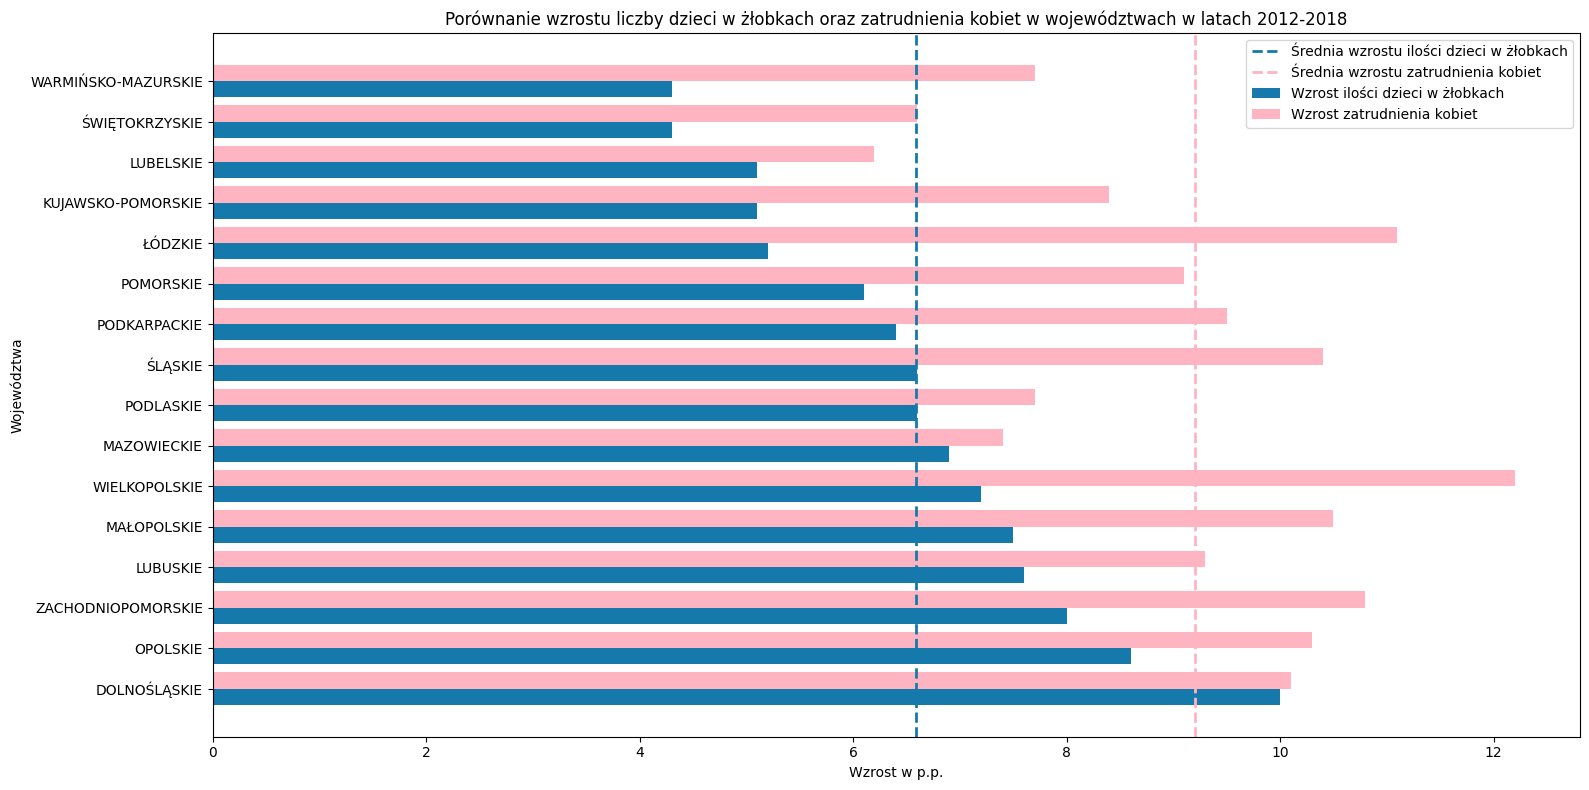

In [119]:
def policz_roznice(dane, lata, wojewodztwa):
    return {woj: dane[woj][lata[1]] - dane[woj][lata[0]] for woj in wojewodztwa}


pracujacy_wzrost_roznica = policz_roznice(
    pracujacy_wspolczynnik_dict, (2012, 2018), wojewodztwa
)
zlobki_wzrost_roznica = policz_roznice(
    zlobki_wspolczynnik_dict, (2012, 2018), wojewodztwa
)

srednia_zlobki = sum(zlobki_wzrost_roznica.values()) / len(wojewodztwa)
srednia_pracujacy = sum(pracujacy_wzrost_roznica.values()) / len(wojewodztwa)

wojewodztwa_posortowane = sorted(
    wojewodztwa, key=lambda w: zlobki_wzrost_roznica[w], reverse=True
)

zlobki_posortowane = [zlobki_wzrost_roznica[woj] for woj in wojewodztwa_posortowane]

pracujacy_posortowani = [
    pracujacy_wzrost_roznica[woj] for woj in wojewodztwa_posortowane
]

plt.figure(figsize=(16, 8))

ilosc_wojewodztw = np.arange(len(wojewodztwa_posortowane))

plt.barh(
    ilosc_wojewodztw - 0.4 / 2,
    zlobki_posortowane,
    height=0.4,
    label="Wzrost ilości dzieci w żłobkach",
    color="#1679AB",
)
plt.barh(
    ilosc_wojewodztw + 0.4 / 2,
    pracujacy_posortowani,
    height=0.4,
    label="Wzrost zatrudnienia kobiet",
    color="#FFB4C2",
)


plt.axvline(
    x=srednia_zlobki,
    color="#1679AB",
    linestyle="--",
    linewidth=2,
    label="Średnia wzrostu ilości dzieci w żłobkach",
)
plt.axvline(
    x=srednia_pracujacy,
    color="#FFB4C2",
    linestyle="--",
    linewidth=2,
    label="Średnia wzrostu zatrudnienia kobiet",
)

plt.yticks(ilosc_wojewodztw, wojewodztwa_posortowane)
plt.xlabel("Wzrost w p.p.")
plt.ylabel("Województwa")
plt.title(
    "Porównanie wzrostu liczby dzieci w żłobkach oraz zatrudnienia kobiet w województwach w latach 2012-2018"
)
plt.legend()
plt.tight_layout()
plt.show()

#### Wnioski

Z danych wynika, że we wszystkich województwach wzrost zatrudnienia kobiet przewyższa wzrost liczby dzieci w żłobkach. Największy wzrost zatrudnienia odnotowano w województwie wielkopolskim, a najmniejszy w lubelskim.

### Porównanie liczby żłobków i liczby pracujących na pełen etat w województwach w 2023 roku

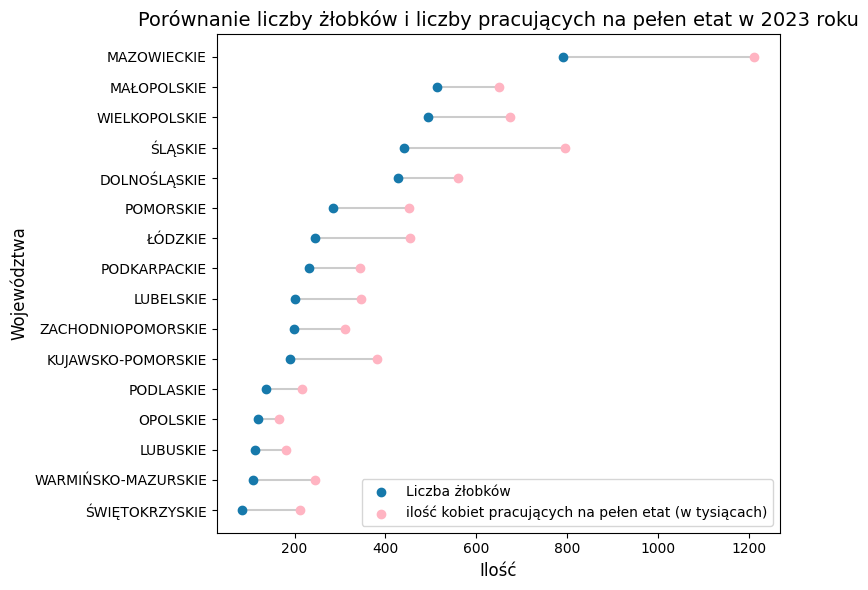

In [124]:
pracujacy_2023 = [pracujacy_na_pelen_etat_dict[woj][2023] for woj in wojewodztwa]
zlobki_2023 = [ilosc_zlobkow[woj][2023] for woj in wojewodztwa]

sorted_indices = list(range(len(zlobki_2023)))
sorted_indices.sort(key=zlobki_2023.__getitem__)

wojewodztwa_posortowane = [wojewodztwa[i] for i in sorted_indices]
zlobki_2023_posortowane = [zlobki_2023[i] for i in sorted_indices]
pracujacy_2023_posortowani = [pracujacy_2023[i] for i in sorted_indices]

plt.figure(figsize=(8, 6))

plt.hlines(
    y=ilosc_wojewodztw,
    xmin=zlobki_2023_posortowane,
    xmax=pracujacy_2023_posortowani,
    color="grey",
    alpha=0.4,
    zorder=2,
)
plt.scatter(
    zlobki_2023_posortowane,
    ilosc_wojewodztw,
    color="#1679AB",
    alpha=1,
    label="Liczba żłobków",
    zorder=3,
)
plt.scatter(
    pracujacy_2023_posortowani,
    ilosc_wojewodztw,
    color="#FFB4C2",
    alpha=1,
    label="ilość kobiet pracujących na pełen etat (w tysiącach)",
    zorder=3,
)

plt.yticks(ilosc_wojewodztw, wojewodztwa_posortowane)
plt.title(
    "Porównanie liczby żłobków i liczby pracujących na pełen etat w 2023 roku",
    fontsize=14,
)
plt.xlabel("Ilość", fontsize=12)
plt.ylabel("Województwa", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#### Wnioski

Wykres pokazuje, że liczba żłobków jest znacząco niższa niż liczba pracujących kobiet we wszystkich województwach. Biorąc pod uwagę, że wzrost zatrudnienia kobiet przewyższa wzrost liczby dzieci w żłobkach, dysproporcja ta prawdopodobnie będzie się pogłębiać. Może to wskazywać na rosnące zapotrzebowanie na instytucje opieki nad dziećmi w przyszłości.

### Liczba pracujących kobiet przypadających na jedno dziecko w żłobkach (2015–2023)

In [121]:
df_ratio = pd.DataFrame(
    [
        {
            "Województwo": woj,
            "Rok": rok,
            "Liczba pracujących kobiet na dziecko": (
                ilosc_pracujacych_kobiet[woj][rok] * 1000
            )
            / ilosc_dzieci_w_zlobkach[woj][rok],
        }
        for woj in wojewodztwa
        for rok in range(2015, 2024)
    ]
).sort_values(["Rok", "Liczba pracujących kobiet na dziecko"], ascending=[True, False])

fig = px.scatter(
    df_ratio,
    x="Liczba pracujących kobiet na dziecko",
    y="Województwo",
    animation_frame="Rok",
    size="Liczba pracujących kobiet na dziecko",
    size_max=30,
    color="Województwo",
    title="Liczba pracujących kobiet przypadających na jedno dziecko w żłobkach (2015-2023)",
)
fig.update_layout(
    showlegend=False,
    title_x=0.5,
    height=800,
    width=1600,
    xaxis=dict(
        range=[
            df_ratio["Liczba pracujących kobiet na dziecko"].min() - 10,
            df_ratio["Liczba pracujących kobiet na dziecko"].max() + 15,
        ]
    ),
)
fig.show()

#### Wnioski

Wykres pokazuje, że liczba pracujących kobiet przypadających na jedno dziecko w żłobku maleje, co może świadczyć o rosnącej liczbie dostępnych miejsc w żłobkach.

### Procentowy udział wzrostu liczby żłobków w okresie 2013–2023

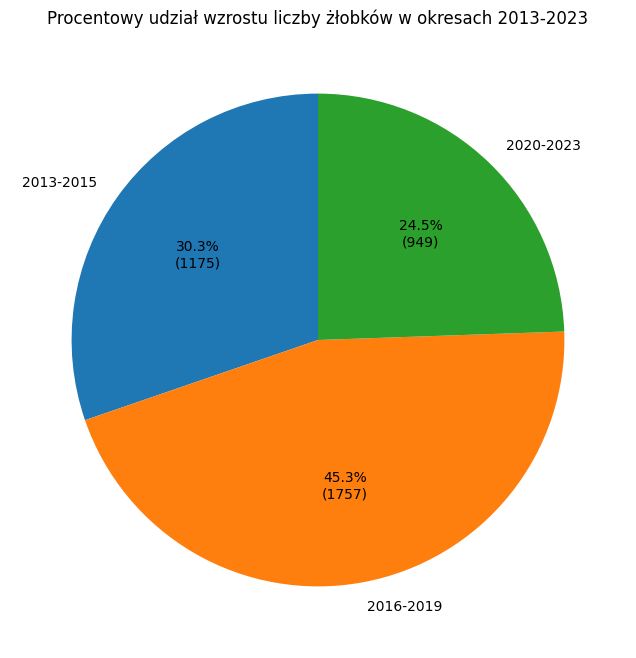

In [122]:
ilosc_zlobkow_wzrost = {
    rok: sum(
        ilosc_zlobkow[woj][rok] - ilosc_zlobkow[woj][rok - 1] for woj in wojewodztwa
    )
    for rok in range(2013, 2024)
}

zlobki_grupy = {
    "2013-2015": sum(ilosc_zlobkow_wzrost[rok] for rok in range(2013, 2016)),
    "2016-2019": sum(ilosc_zlobkow_wzrost[rok] for rok in range(2016, 2020)),
    "2020-2023": sum(ilosc_zlobkow_wzrost[rok] for rok in range(2020, 2024)),
}

suma_zlobkow = sum(ilosc_zlobkow_wzrost.values())

plt.figure(figsize=(8, 8))
plt.pie(
    list(zlobki_grupy.values()),
    labels=list(zlobki_grupy.keys()),
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct * sum(zlobki_grupy.values()) / 100)})",
    startangle=90,
)
plt.title("Procentowy udział wzrostu liczby żłobków w okresach 2013-2023")
plt.show()

#### Wnioski

W latach 2016–2019 powstało aż 45% wszystkich nowych żłobków, co znacząco przyczyniło się do poprawy dostępności opieki nad dziećmi. Tempo wzrostu liczby placówek było najwyższe w tym okresie, natomiast w kolejnych latach rozwój żłobków nieco zwolnił.

## Podsumowanie


Na podstawie wykresów trudno jednoznacznie określić bezpośrednią zależność między liczbą żłobków a poziomem zatrudnienia kobiet, ponieważ wpływa na nie wiele różnych czynników. Dane sugerują jednak, że zarówno liczba placówek opiekuńczych, jak i aktywność zawodowa kobiet systematycznie rosną z roku na rok.